# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](https://github.com/plajuan/DSA_Python/blob/main/Cap13/Cap13/imagens/Projeto2.png?raw=1)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.12


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('https://raw.githubusercontent.com/plajuan/DSA_Python/main/Cap13/dados/dataset.csv')

In [4]:
# Shape
df_dsa.shape

(9700, 11)

In [5]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [15]:
df_dsa[df_dsa['Categoria'] == 'Office Supplies'].sort_values(by='Valor_Venda', ascending=False).head(1)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9036,CA-2017-117121,17/12/2017,AB-10105,Consumer,United States,Detroit,Michigan,OFF-BI-10000545,Office Supplies,Binders,9892.74


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [18]:
df_Total_de_Vendas_Por_Data_do_Pedido = df_dsa.groupby(by='Data_Pedido')['Valor_Venda'].sum()
df_Total_de_Vendas_Por_Data_do_Pedido.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

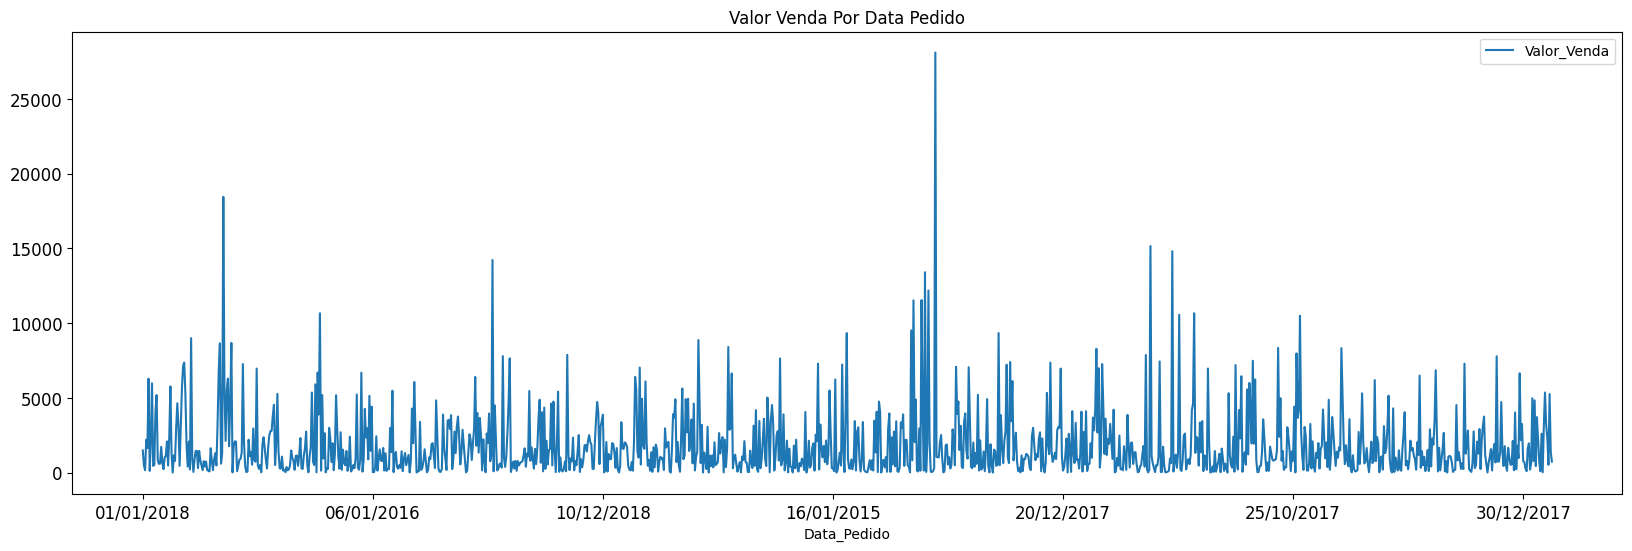

In [25]:
#First attempt
#ax = df_Total_de_Vendas_Por_Data_do_Pedido.plot(kind='bar', title ="Valor Venda", figsize=(20, 6), legend=True, fontsize=12)
ax = df_Total_de_Vendas_Por_Data_do_Pedido.plot(x='Data_Pedido', y='Valor_Venda', title ="Valor Venda Por Data Pedido", figsize=(20, 6), legend=True, fontsize=12)
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

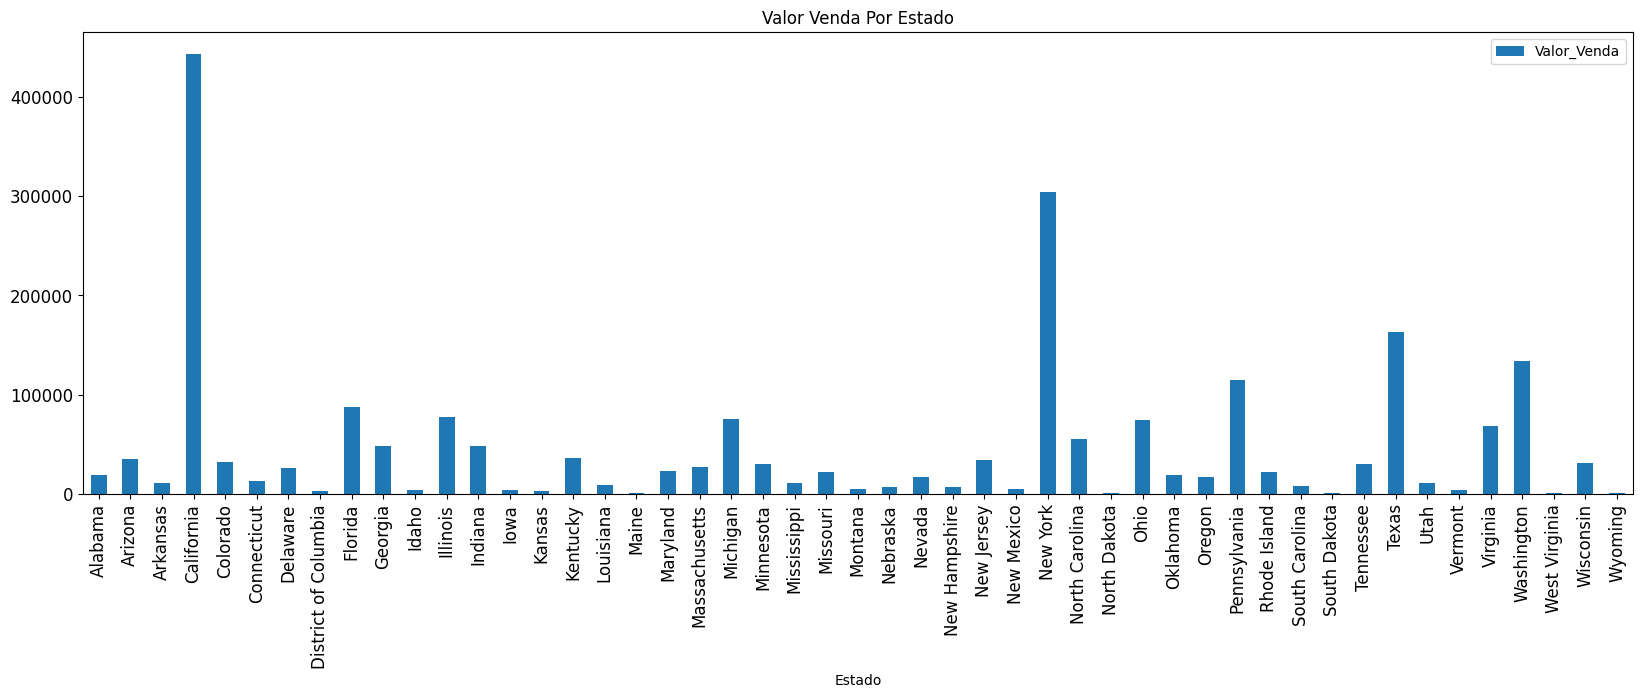

In [29]:
df_Total_de_Vendas_Por_Estado = df_dsa.groupby(by='Estado')['Valor_Venda'].sum()
ax = df_Total_de_Vendas_Por_Estado.plot(x='Estado', y='Valor_Venda', title ="Valor Venda Por Estado", figsize=(20, 6), legend=True, fontsize=12, kind='bar')
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [39]:
df_cidade_mais_vendas = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False).head(10)
df_cidade_mais_vendas

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


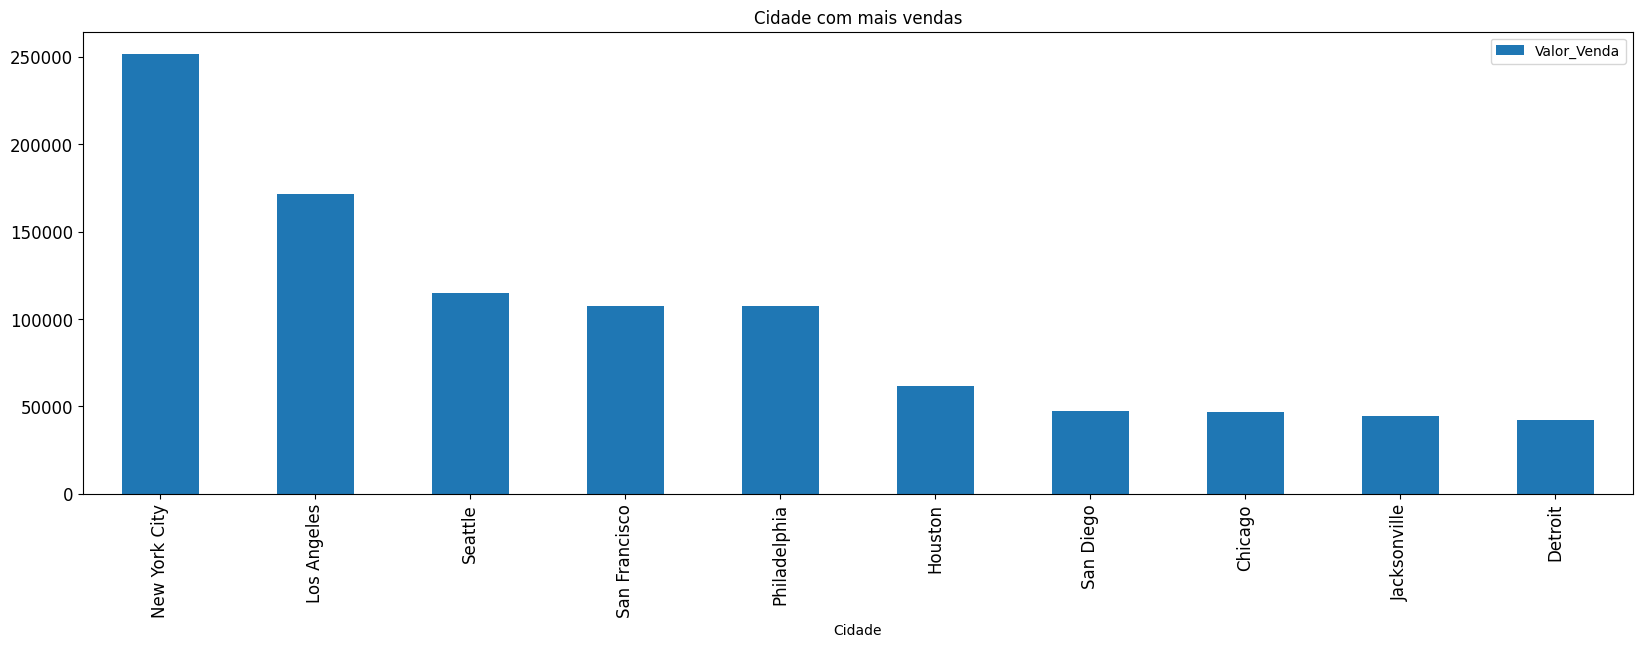

In [40]:
ax = df_cidade_mais_vendas.plot(x='Cidade', y='Valor_Venda', kind='bar', title='Cidade com mais vendas', figsize=(20,6), legend=True, fontsize=12)
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

<Axes: ylabel='Valor_Venda'>

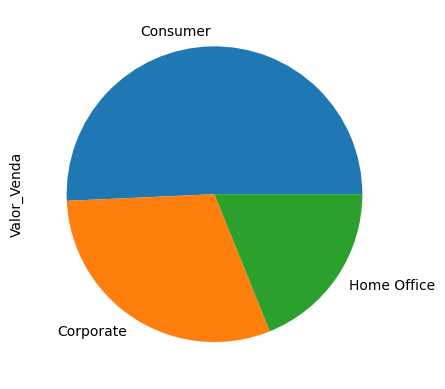

In [43]:
df_segmento_vendas = df_dsa.groupby('Segmento')['Valor_Venda'].sum()
df_segmento_vendas.plot(kind='pie')

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [46]:
df_dsa_tmp = df_dsa
df_dsa_tmp['Ano'] = pd.to_datetime(arg=df_dsa['Data_Pedido'], dayfirst=True).dt.year
df_dsa_tmp.groupby(['Segmento', 'Ano'])['Valor_Venda'].sum()

Segmento     Ano 
Consumer     2015    256719.9166
             2016    265295.2593
             2017    288459.5572
             2018    323359.6019
Corporate    2015    125819.5957
             2016    114643.1229
             2017    203266.7398
             2018    235502.7284
Home Office  2015     88229.0878
             2016     74134.1332
             2017    103639.6270
             2018    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [58]:
df_dsa_tmp['Desconto'] = np.where(df_dsa_tmp['Valor_Venda'] > 1000, 0.15, 0.10)
df_dsa_tmp.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [61]:
df_dsa_tmp['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [65]:
df_dsa_tmp['Valor_Venda_Com_Desconto'] = df_dsa_tmp['Valor_Venda'] - (df_dsa_tmp['Valor_Venda']*df_dsa_tmp['Desconto'])
media_antes_desconto = df_dsa_tmp[ df_dsa_tmp['Desconto'] == 0.15 ]['Valor_Venda'].mean()
media_depois_desconto = df_dsa_tmp[ df_dsa_tmp['Desconto'] == 0.15 ]['Valor_Venda_Com_Desconto'].mean()
print('Média antes do desconto: ', round(media_antes_desconto, 2) )
print('Média depois do desconto: ', round(media_depois_desconto, 2) )


Média antes do desconto:  2116.81
Média depois do desconto:  1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [67]:
df_dsa_tmp['Mes'] = pd.to_datetime(arg=df_dsa['Data_Pedido'], dayfirst=True).dt.month
df_dsa_tmp.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].mean()

Segmento     Ano   Mes
Consumer     2015  1      146.736787
                   2      117.327926
                   3      152.170564
                   4      189.762750
                   5      191.337439
                             ...    
Home Office  2018  8      176.160606
                   9      249.140597
                   10     412.576597
                   11     247.519423
                   12     224.523983
Name: Valor_Venda, Length: 144, dtype: float64

In [68]:
df_dsa_tmp.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

Demonstre tudo através de um único gráfico.

In [80]:
df_tmp = df_dsa_tmp.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum()
df_tmp

Categoria        SubCategoria
Furniture        Bookcases       108045.0467
                 Chairs          317919.6250
                 Furnishings      88862.7700
                 Tables          202083.3600
Office Supplies  Appliances      104061.6930
                 Art              26573.7360
                 Binders         194723.3810
                 Envelopes        15791.1820
                 Fasteners         3001.9600
                 Labels           12267.3660
                 Paper            76312.7640
                 Storage         216188.3620
                 Supplies         46177.3280
Technology       Accessories     162791.3620
                 Copiers         146248.0940
                 Machines        189238.6310
                 Phones          325271.2940
Name: Valor_Venda, dtype: float64

In [81]:
anos = df_tmp.index.get_level_values(0)
meses = df_tmp.index.get_level_values(1)
segmentos = df_tmp.index.get_level_values(2)

IndexError: Too many levels: Index has only 2 levels, not 3

# Fim